<a href="https://colab.research.google.com/github/mbeyazitkaygi/nasaappchallenges/blob/main/sonification_lastversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# We upload the csv file to the colab environment.
uploaded = files.upload()

# We check the accuracy of the uploaded file.
for filename in uploaded.keys():
    print(f"Name of uploaded csv file: {filename}")


Saving Exo_Moon.csv to Exo_Moon.csv
Name of uploaded csv file: Exo_Moon.csv


In [3]:
#We import the pandas library.
import pandas as pd

# We write the name of the csv data file.
filename = 'Exo_Moon'

#We load the data as Pandas dataframe.
df = pd.read_csv('/content/' + filename + '.csv')

#we sort the data as R G B (optional, does not affect sonification)
df = df.sort_values(by=['B'], ascending=False)

n_impacts = len(df)
print(n_impacts, 'impacts')

#We take a look at the first 5 lines.
df.head()

681984 impacts


,R,G,B
398810,237,203,219
551479,250,210,218
323891,217,217,217
556606,251,210,216
400856,235,205,215


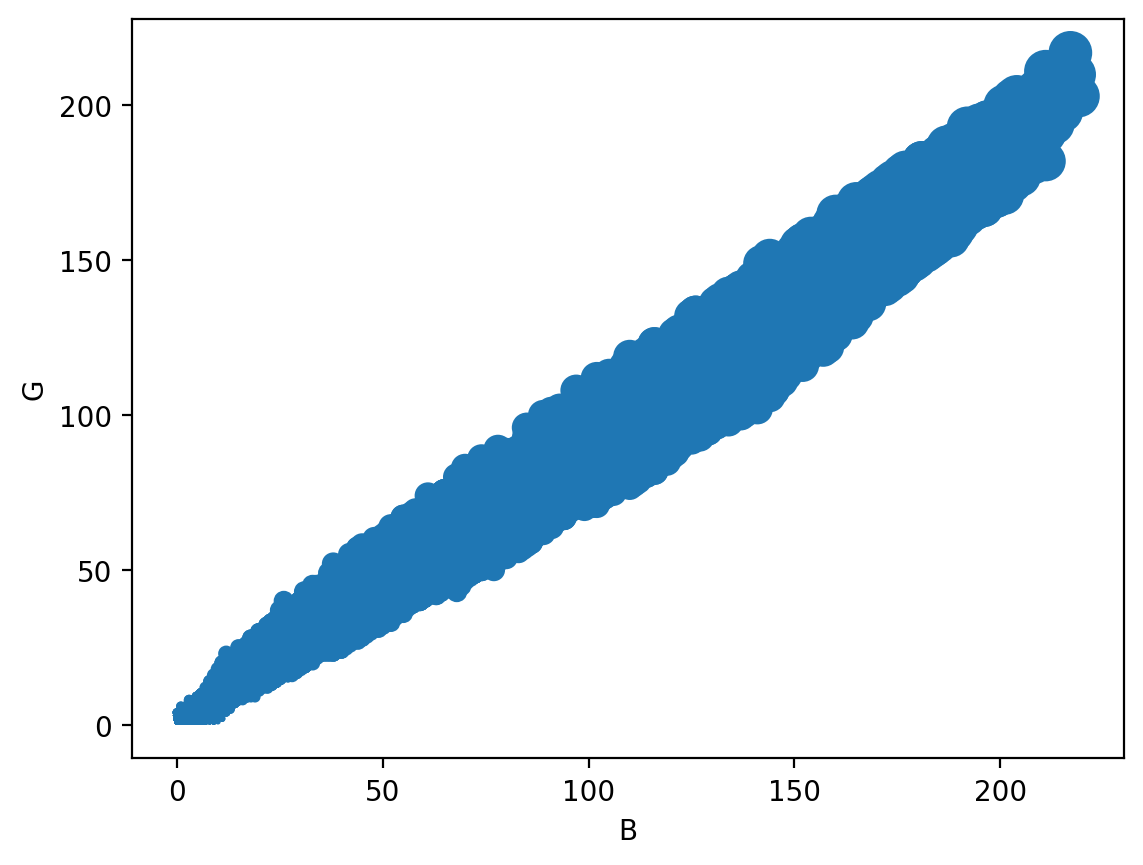

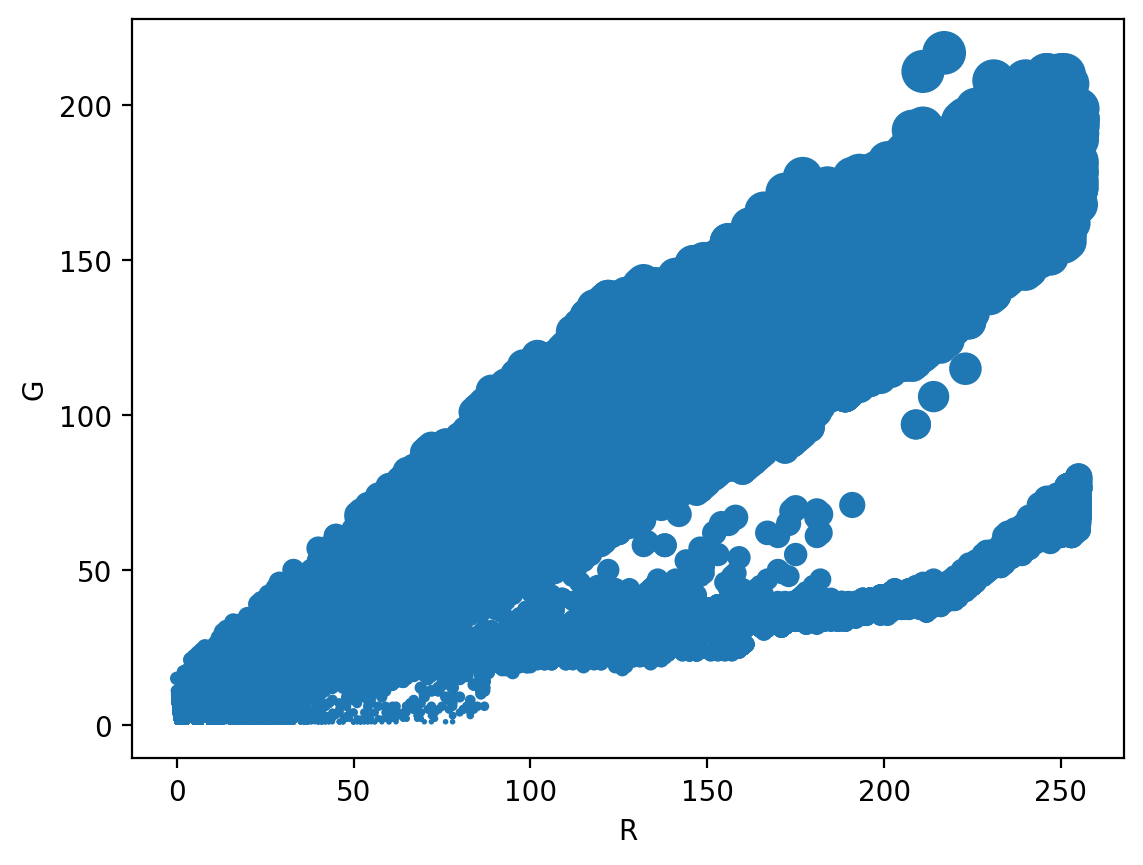

In [24]:
#We import plotting library for visualization data.
import matplotlib.pylab as plt
Rs = df['R'].values
Bs = df['B'].values    #this is a numpy array (not a list), you can do mathematical operations directly on the object
Gs = df['G'].values

plt.scatter(Bs, Gs, s=Gs)
plt.xlabel('B')
plt.ylabel('G')
plt.show()


plt.scatter(Rs, Gs, s=Gs)
plt.xlabel('R')
plt.ylabel('G')
plt.show()

In [25]:
def map_value(value, min_value, max_value, min_result, max_result):
    '''maps value (or array of values) from one range to another'''

    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result


In [26]:
myrs_per_beat = 25  #number of rgb code for each beat of music

t_data = Rs/myrs_per_beat #rescale time from rgb code to beats


duration_beats = max(t_data)  #duration in beats (actually, onset of last note)
print('Duration:', duration_beats, 'beats')


Duration: 10.2 beats


In [27]:
duration_beats = 52.8 #desired duration in beats (actually, onset of last note)

t_data = map_value(Rs, 0, max(Rs), 0, duration_beats)

#or
#t_data = map_value(ages, min(ages), max(ages), duration_beats, 0)

rgbcode_per_beat = max(Rs)/duration_beats
print('Rgb code per beat:', rgbcode_per_beat)

Rgb code per beat: 4.829545454545455


Duration: 52.8 seconds


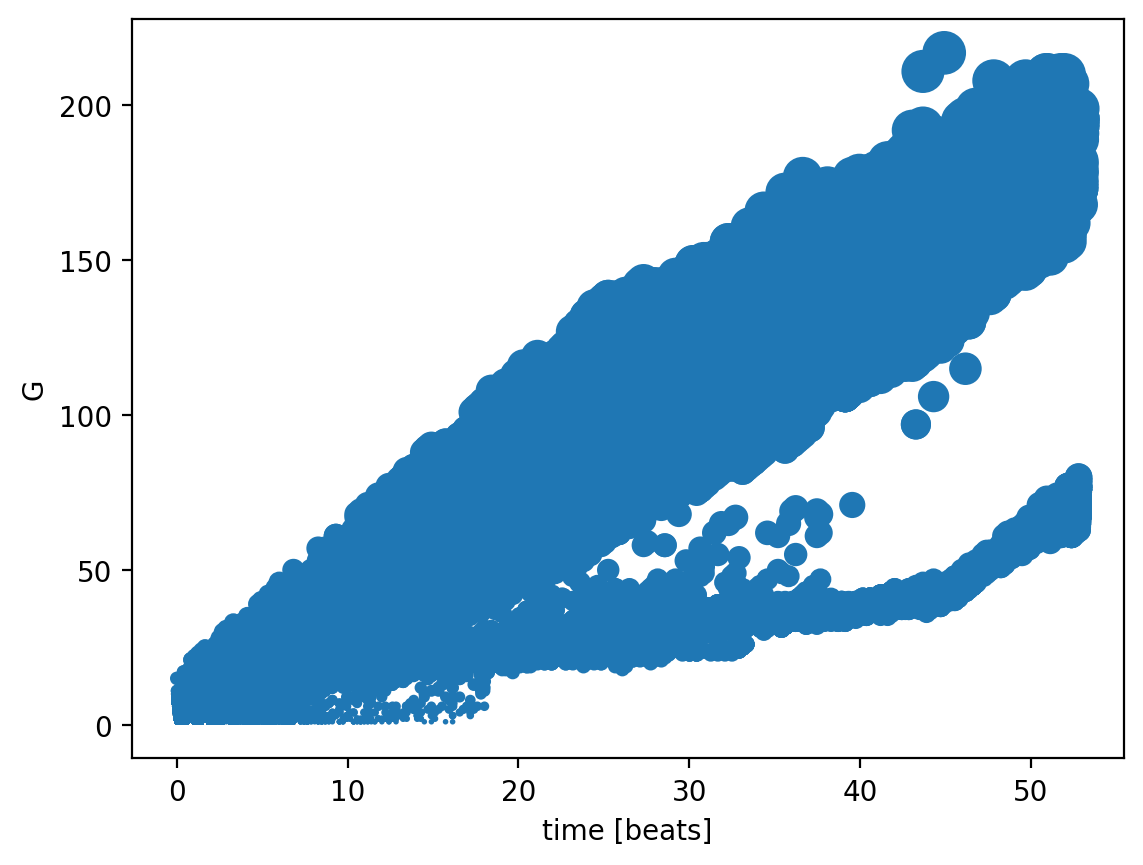

In [28]:
#calculate duration in seconds
bpm = 60  #if bpm = 60, 1 beat = 1 sec
duration_sec = duration_beats*60/bpm #duration in seconds (actually, onset of last note)
print('Duration:', duration_sec, 'seconds')


plt.scatter(t_data, Gs, s=Gs)
plt.xlabel('time [beats]')
plt.ylabel('G')
plt.show()

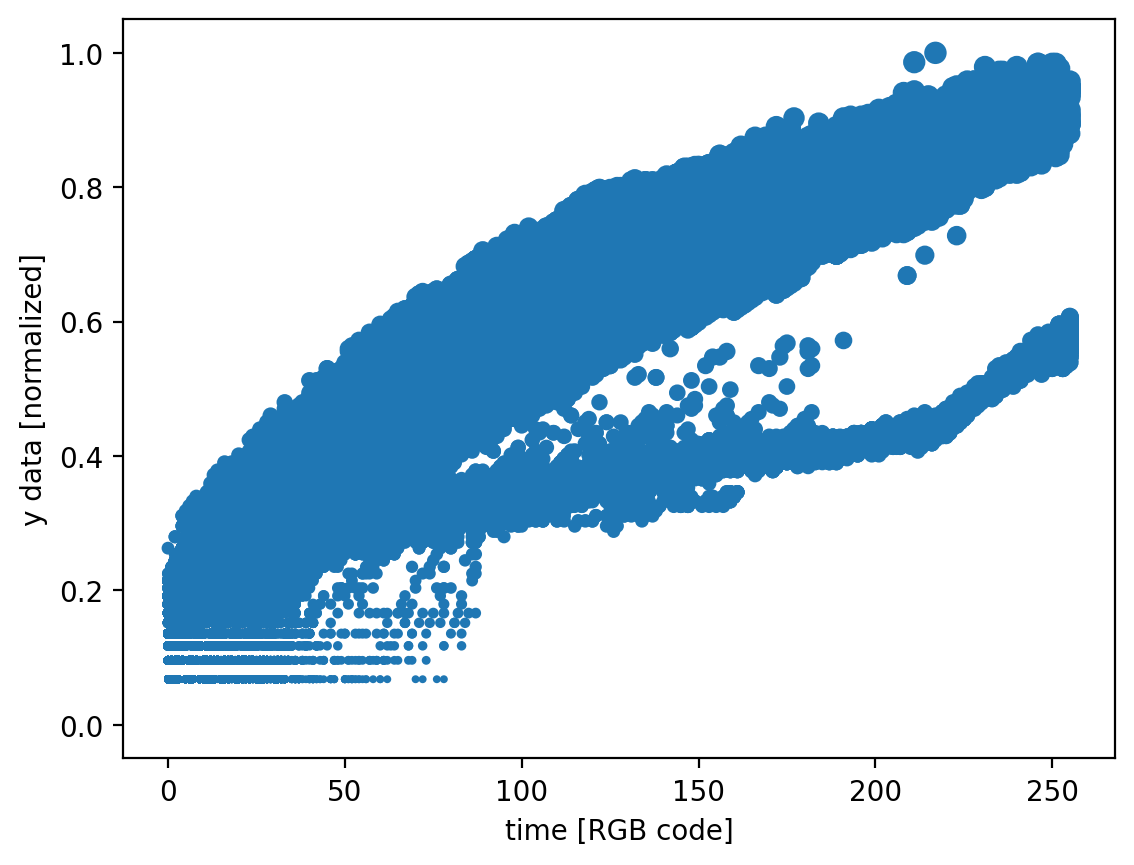

In [29]:
y_data = map_value(Gs, min(Gs), max(Gs), 0, 1) #normalize data, so it runs from 0 to 1

#lower than 1 to spread out more evenly
y_scale = 0.5

y_data = y_data**y_scale

plt.scatter(Rs, y_data, s=50*y_data)
plt.xlabel('time [RGB code]')
plt.ylabel('y data [normalized]')
plt.show()

In [30]:
!pip install audiolazy

In [31]:
from music21 import note

# 4 octaves of major scale
note_names = ['C2','D2','E2','F2','G2','A2','B2',
             'C3','D3','E3','F3','G3','A3','B3',
             'C4','D4','E4','F4','G4','A4','B4',
             'C5','D5','E5','F5','G5','A5','B5']

#4 octaves of major pentatonic scale
note_names = ['C2','D2','E2','G2','A2',
             'C3','D3','E3','G3','A3',
             'C4','D4','E4','G4','A4',
             'C5','D5','E5','G5','A5']

#custom note set (a voicing of a Cmaj13#11 chord, notes from C lydian)
note_names = ['C1','C2','G2',
             'C3','E3','G3','A3','B3',
             'D4','E4','G4','A4','B4',
             'D5','E5','G5','A5','B5',
             'D6','E6','F#6','G6','A6']


# We convert note names into MIDI numbers.
note_midis = [note.Note(n).pitch.midi for n in note_names]

n_notes = len(note_midis)
print('Resolution:', n_notes, 'note')


Resolution: 23 note


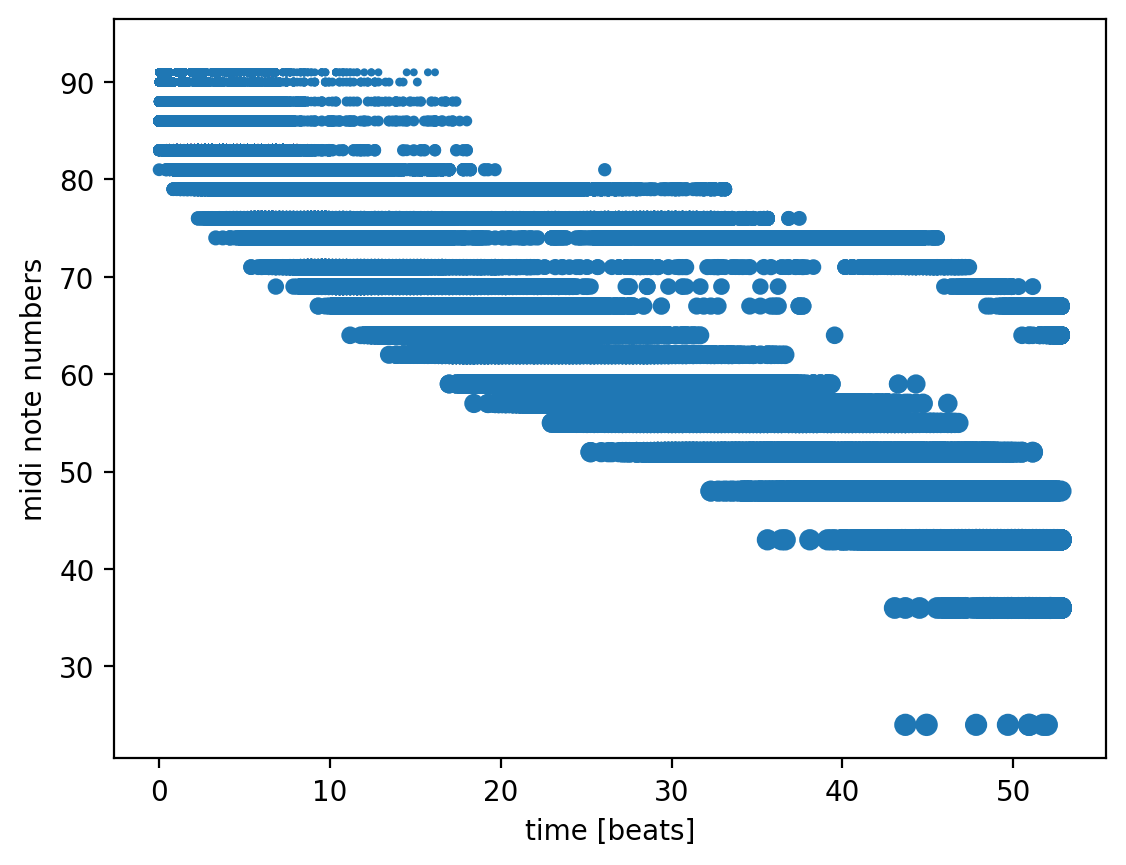

In [32]:
midi_data = []
for i in range(n_impacts):
    note_index = round(map_value(y_data[i], 0, 1, n_notes-1, 0)) #notice choice of polarity: bigger craters are mapped to lower notes
                                                        #we round the result because it's a list index which must be an integer
    midi_data.append(note_midis[note_index])

plt.scatter(t_data, midi_data, s=50*y_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()


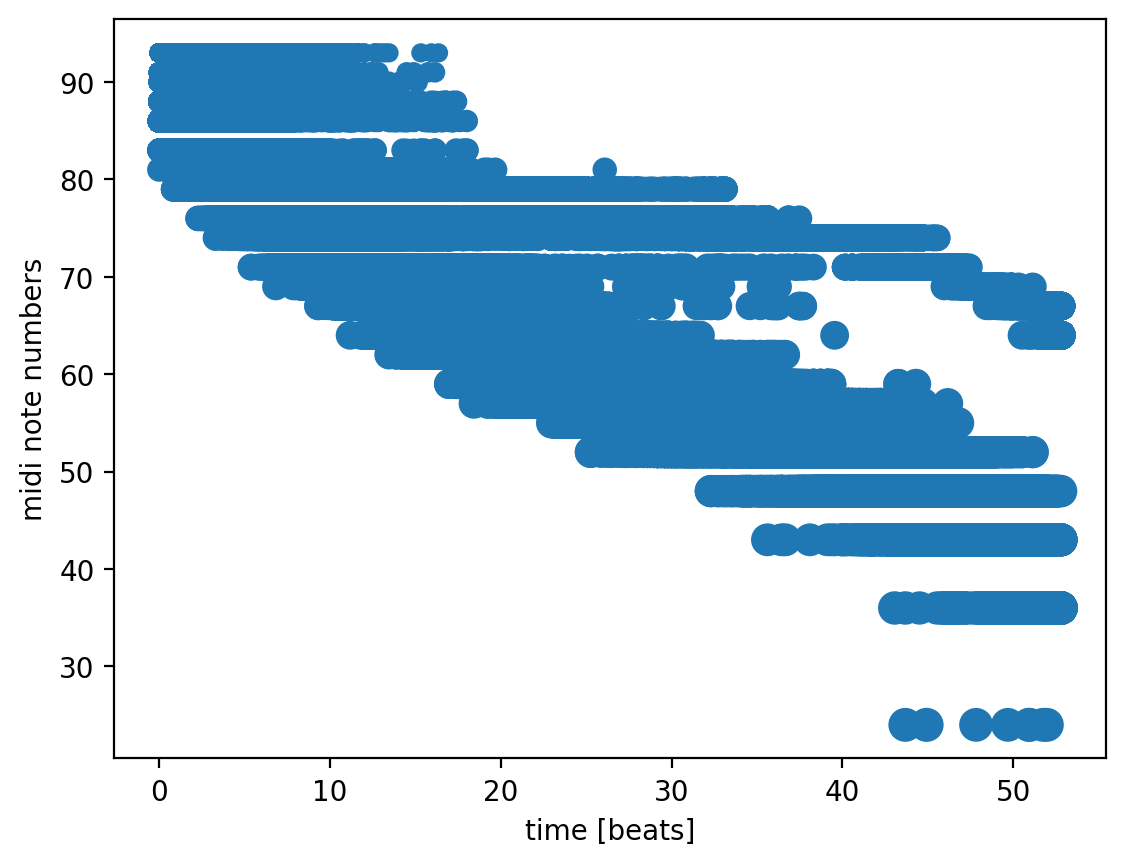

In [33]:
vel_min,vel_max = 35,127   #minimum and maximum note velocity

vel_data = []
for i in range(n_impacts):
    note_velocity = round(map_value(y_data[i], 0, 1, vel_min, vel_max))

    vel_data.append(note_velocity)

plt.scatter(t_data, midi_data, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

In [34]:
!pip install midiutil

In [35]:
from midiutil import MIDIFile #we import library to make midi file.

#we create midi file object, add tempo
my_midi_file = MIDIFile(1) #one track
my_midi_file.addTempo(track=0, time=0, tempo=bpm)

#we add midi notes
for i in range(n_impacts):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data[i], duration=2, volume=vel_data[i])

#we create and save the midi file itself
with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f)


In [36]:
from google.colab import files

#We download the file to our computer
files.download(filename + '.mid')  # Download the generated MIDI file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>